In [1]:
import cvxpy as cvx
import numpy as np

import matplotlib.pyplot as plt
from scipy import signal
import random
from scipy.stats import laplace_asymmetric
from sklearn.metrics import mean_absolute_error as mae


import sys
sys.path.append('/Users/smiskov/Documents/SLAC/PVInsight/solar-data-tools/tests/fixtures/signal_decompositions/')
from utils import plot_decomp, plot_signal

# CVXPY
from solardatatools.signal_decompositions import tl1_l1d1_l2d2p365 as cvx_sd
# OSD
from solardatatools.osd_signal_decompositions import tl1_l1d1_l2d2p365 as osd_sd

np.random.seed(12) 
random.seed(10)

## `tl1_l1d1_l2d2p365`

### Create input signal

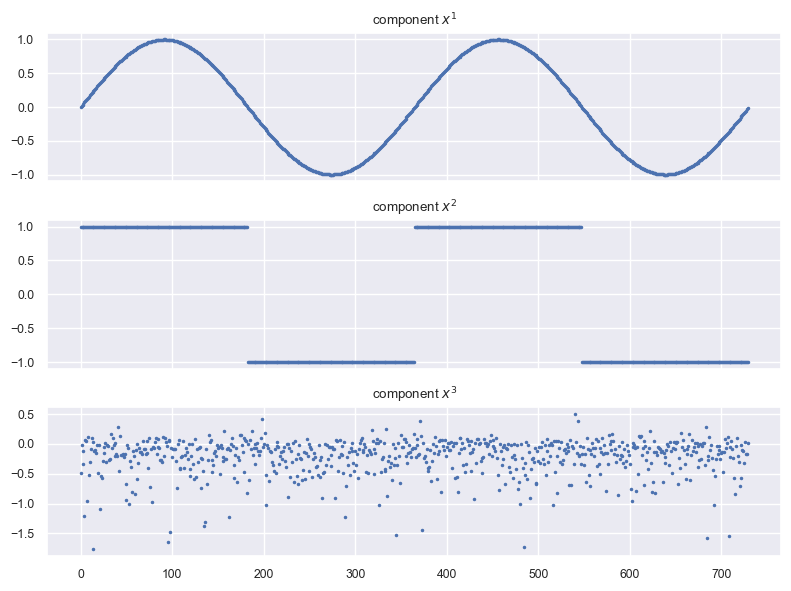

In [2]:
t = np.arange(365*2)

# seasonal term
signal1 = np.sin(2 * np.pi * t * 1 / (365.))
# piecewise constant term
signal2 = signal.square(2 * np.pi * t * 1 / (365.))
# asymmetric laplace noise 
kappa = 2 # k>0, k=1 is laplace
signal3 = 0.15 * laplace_asymmetric.rvs(kappa, size=len(signal1))

X_real = np.zeros((3, len(t)), dtype=float)
X_real[0] = signal1
X_real[1] = signal2
X_real[2] = signal3
y = np.sum(X_real, axis=0)

plot_decomp(X_real)

In [3]:
np.quantile(signal3, 0.8) 

0.006092775222533824

# MOSEK/MOSEK

CVXPY objective       98.79335
OSD objective, scaled 119.86609
s_hat MAE (OSD,CVX)   4.85e-02
s_seas MAE (OSD,CVX)   4.94e-02


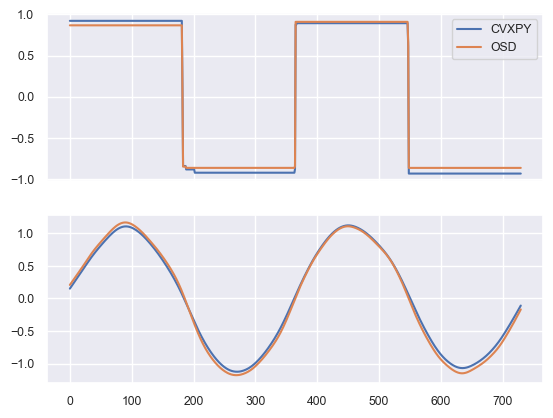

In [15]:
#s_hat_cvxpy_mosek, s_seas_cvxpy_mosek = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, linear_term=False, solver="MOSEK")
s_hat_cvxpy_mosek, s_seas_cvxpy_mosek = cvx_sd(y, tau=0.8, c1=5, c2=1e5, linear_term=False, solver="MOSEK")
s_hat_osd_mosek, s_seas_osd_mosek = osd_sd(y, tau=0.8, w1=5, w2=1e5, solver="MOSEK")

obj_osd_scaled = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, linear_term=False, comp_osd=[s_hat_osd_mosek, s_seas_osd_mosek]) 
print(f's_hat MAE (OSD,CVX)   {mae(s_hat_cvxpy_mosek, s_hat_osd_mosek):.2e}')
print(f's_seas MAE (OSD,CVX)   {mae(s_seas_cvxpy_mosek, s_seas_osd_mosek):.2e}')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(s_hat_cvxpy_mosek, label="CVXPY")
ax1.plot(s_hat_osd_mosek, label="OSD")
ax2.plot(s_seas_cvxpy_mosek)
ax2.plot(s_seas_osd_mosek)
ax1.legend()
plt.show()

# MOSEK+LinearTerm/MOSEK

CVXPY objective       117.35936
OSD objective, scaled 118.90069
s_hat MAE (OSD,CVX)   8.72e-02
s_seas MAE (OSD,CVX)   9.14e-02


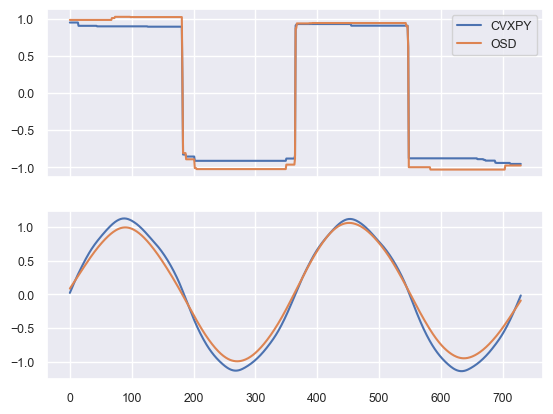

In [17]:
s_hat_cvxpy_mosek, s_seas_cvxpy_mosek = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, solver="MOSEK")
s_hat_osd_mosek, s_seas_osd_mosek = osd_sd(y, tau=0.8, w1=5, w2=5e5, solver="MOSEK")

obj_osd_scaled = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, comp_osd=[s_hat_osd_mosek, s_seas_osd_mosek]) 
print(f's_hat MAE (OSD,CVX)   {mae(s_hat_cvxpy_mosek, s_hat_osd_mosek):.2e}')
print(f's_seas MAE (OSD,CVX)   {mae(s_seas_cvxpy_mosek, s_seas_osd_mosek):.2e}')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(s_hat_cvxpy_mosek, label="CVXPY")
ax1.plot(s_hat_osd_mosek, label="OSD")
ax2.plot(s_seas_cvxpy_mosek)
ax2.plot(s_seas_osd_mosek)
ax1.legend()
plt.show()

# MOSEK/QSS

CVXPY objective       98.79335
OSD objective, scaled 121.04724
s_hat MAE (OSD,CVX)   9.13e-01
s_seas MAE (OSD,CVX)   9.02e-01


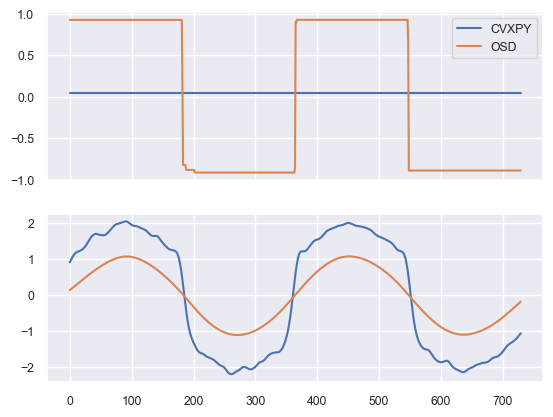

In [6]:
s_hat_cvxpy_mosek, s_seas_cvxpy_mosek = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, linear_term=False, solver="MOSEK")
s_hat_osd_mosek, s_seas_osd_mosek = osd_sd(y, tau=0.8, w1=7, w2=5e5, solver="QSS")

obj_osd_scaled = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, linear_term=False, comp_osd=[s_hat_osd_mosek, s_seas_osd_mosek]) 
print(f's_hat MAE (OSD,CVX)   {mae(s_hat_cvxpy_mosek, s_hat_osd_mosek):.2e}')
print(f's_seas MAE (OSD,CVX)   {mae(s_seas_cvxpy_mosek, s_seas_osd_mosek):.2e}')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(s_hat_cvxpy_mosek, label="CVXPY")
ax1.plot(s_hat_osd_mosek, label="OSD")
ax2.plot(s_seas_cvxpy_mosek)
ax2.plot(s_seas_osd_mosek)
ax1.legend()
plt.show()

# MOSEK/QSS+SumCard

CVXPY objective       98.79335
OSD objective, scaled 93.56095
s_hat MAE (OSD,CVX)   1.42e-01
s_seas MAE (OSD,CVX)   2.24e-01


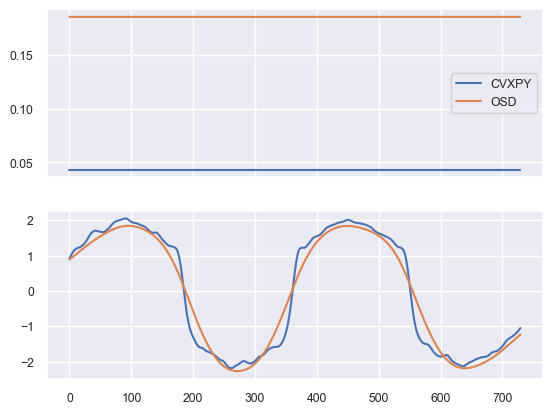

In [22]:
s_hat_cvxpy_mosek, s_seas_cvxpy_mosek = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100,linear_term=False, solver="MOSEK")
s_hat_osd_mosek, s_seas_osd_mosek = osd_sd(y, tau=0.8, w1=7, w2=5e5, sum_card=True, solver="QSS")

obj_osd_scaled = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, linear_term=False, comp_osd=[s_hat_osd_mosek, s_seas_osd_mosek]) 
print(f's_hat MAE (OSD,CVX)   {mae(s_hat_cvxpy_mosek, s_hat_osd_mosek):.2e}')
print(f's_seas MAE (OSD,CVX)   {mae(s_seas_cvxpy_mosek, s_seas_osd_mosek):.2e}')

f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
ax1.plot(s_hat_cvxpy_mosek, label="CVXPY")
ax1.plot(s_hat_osd_mosek, label="OSD")
ax2.plot(s_seas_cvxpy_mosek)
ax2.plot(s_seas_osd_mosek)
ax1.legend()
plt.show()

3
CVXPY objective       98.79335
OSD objective, scaled 93.56095
s_hat MAE (OSD,CVX)   1.42e-01
s_seas MAE (OSD,CVX)   2.24e-01


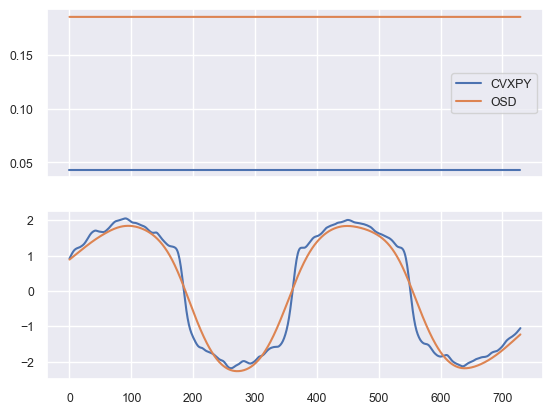

53
CVXPY objective       98.79335
OSD objective, scaled 93.56095
s_hat MAE (OSD,CVX)   1.42e-01
s_seas MAE (OSD,CVX)   2.24e-01


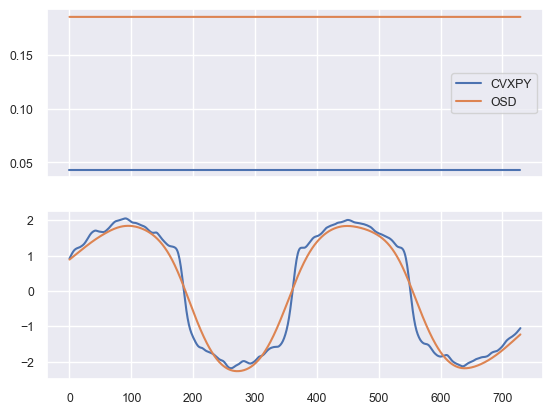

103
CVXPY objective       98.79335
OSD objective, scaled 93.56095
s_hat MAE (OSD,CVX)   1.42e-01
s_seas MAE (OSD,CVX)   2.24e-01


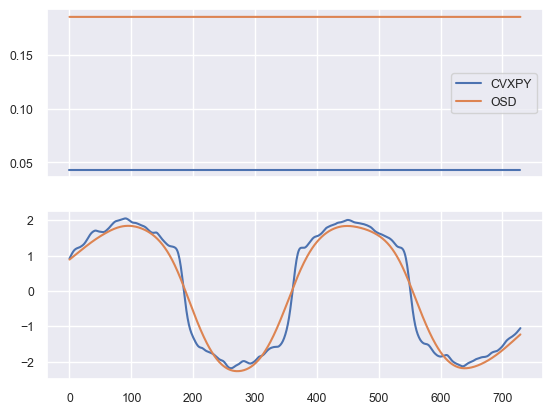

153
CVXPY objective       98.79335
OSD objective, scaled 93.56095
s_hat MAE (OSD,CVX)   1.42e-01
s_seas MAE (OSD,CVX)   2.24e-01


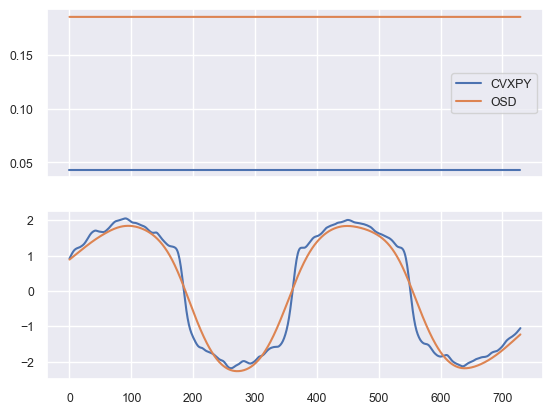

203
CVXPY objective       98.79335
OSD objective, scaled 93.56095
s_hat MAE (OSD,CVX)   1.42e-01
s_seas MAE (OSD,CVX)   2.24e-01


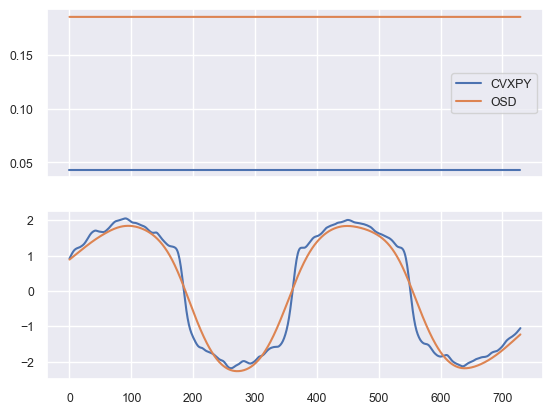

253
CVXPY objective       98.79335
OSD objective, scaled 93.56095
s_hat MAE (OSD,CVX)   1.42e-01
s_seas MAE (OSD,CVX)   2.24e-01


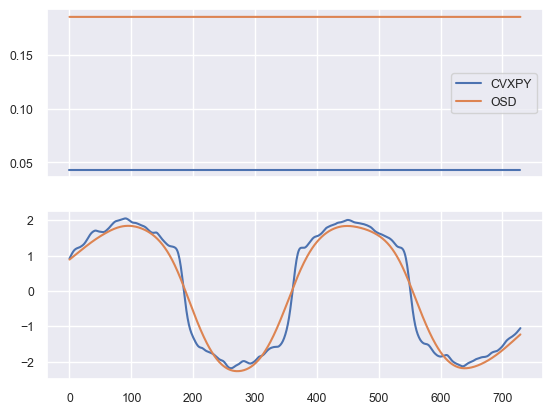

303


KeyboardInterrupt: 

In [8]:
for i in range(3, 1000, 50):
    print(i)
    s_hat_cvxpy_mosek, s_seas_cvxpy_mosek = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, linear_term=False, solver="MOSEK")
    s_hat_osd_mosek, s_seas_osd_mosek = osd_sd(y, tau=0.8, w1=i, w2=5e5, sum_card=True, solver="QSS")

    obj_osd_scaled = cvx_sd(y, tau=0.8, c1=5, c2=500, c3=100, linear_term=False, comp_osd=[s_hat_osd_mosek, s_seas_osd_mosek]) 
    print(f's_hat MAE (OSD,CVX)   {mae(s_hat_cvxpy_mosek, s_hat_osd_mosek):.2e}')
    print(f's_seas MAE (OSD,CVX)   {mae(s_seas_cvxpy_mosek, s_seas_osd_mosek):.2e}')

    f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
    ax1.plot(s_hat_cvxpy_mosek, label="CVXPY")
    ax1.plot(s_hat_osd_mosek, label="OSD")
    ax2.plot(s_seas_cvxpy_mosek)
    ax2.plot(s_seas_osd_mosek)
    ax1.legend()
    plt.show()